<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('Display.max_columns', None)
pd.set_option('Display.max_rows',None)

#### Read the data

Load the csv file and print the first five observations.

In [11]:
df = pd.read_csv('seedtype_data.csv')

df.head()

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.76,13.38,5.073,3.155,4.830,0.0
1,12.13,13.73,5.394,3.745,5.220,0.0
2,14.86,14.67,NaN,3.258,5.351,0.0
3,15.69,14.75,5.527,3.514,5.046,0.0
4,19.94,16.92,6.675,3.763,6.550,1.0


**The data definition is as follows:** <br>

**Area**: Area of the wheat kernel 

**Perimeter**: Perimeter of the wheat kernel

**Kernel_len**: Length of the wheat kernel

**Kernel_width**: Width of the wheat kernel

**Kernelgroove_len**: Length of the wheat kernel groove

**Type**: Type of the wheat seed (0 = Kama Wheat, 1 = Rosa Wheat) (target/dependent variable)

Our objective is to predict whether the wheat seed is of Kama or Rosa type.

In [12]:
df.shape

(202, 6)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              199 non-null    float64
 1   Perimeter         199 non-null    float64
 2   Kernel_len        193 non-null    float64
 3   Kernel_width      199 non-null    float64
 4   Kernelgroove_len  199 non-null    float64
 5   Type              199 non-null    float64
dtypes: float64(6)
memory usage: 9.6 KB


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is there any record where no data have been reported? If yes, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
(df.isnull().sum(axis=1)==6).sum()

3

In [18]:
df.dropna(how='all',inplace=True)

df.shape

(199, 6)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Use the visualization technique to identify the variables with missing data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

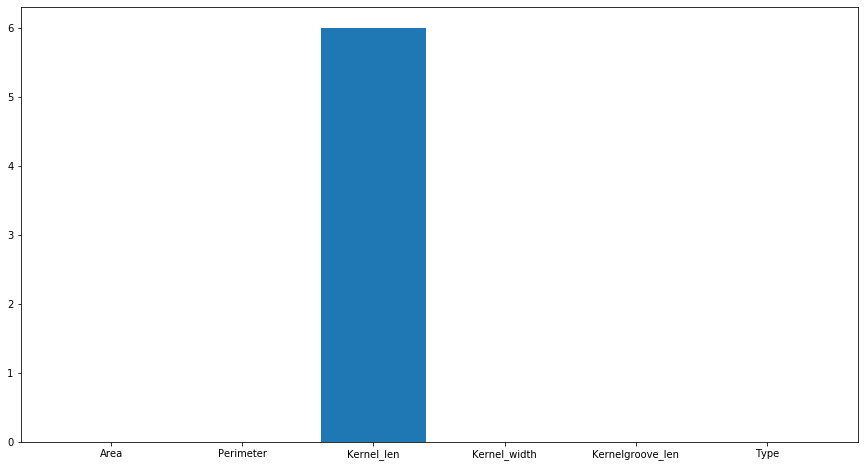

In [19]:
plt.figure(figsize=(15,8))

null_var = df.isnull().sum()

plt.bar(x = null_var.index, height = null_var.values)

plt.show()

In [20]:
null_var

Area                0
Perimeter           0
Kernel_len          6
Kernel_width        0
Kernelgroove_len    0
Type                0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Use the appropriate technique to replace the missing data in the variable representing the length of a wheat kernel
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
df['Kernel_len'] = df['Kernel_len'].fillna(df['Kernel_len'].median())

In [22]:
df.isnull().sum()

Area                0
Perimeter           0
Kernel_len          0
Kernel_width        0
Kernelgroove_len    0
Type                0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the variables containing extreme values and remove such observations, if present
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

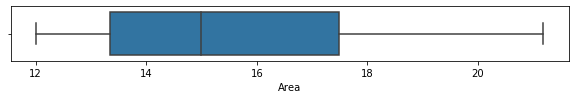

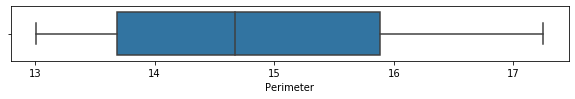

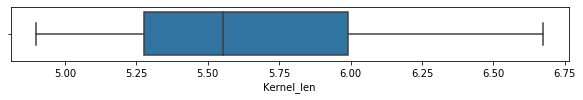

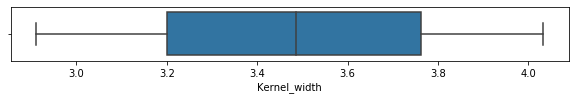

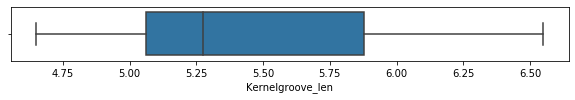

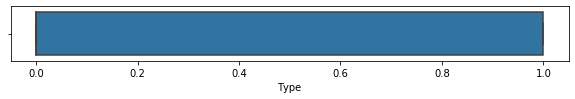

In [23]:
for i in df.columns:
    plt.figure(figsize = (10,1))
    sns.boxplot(df[i])
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Apply the gradient boosting on 80% of the data with 250 estimators each of maximum depth 2. Also, calculate the precision and sensitivity using the confusion matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
X = df.drop('Type', axis = 1)

y = df['Type']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((159, 5), (40, 5), (159,), (40,))

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 250, max_depth = 2)

gbc.fit(X_train, y_train)

y_test_pred = gbc.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

cm

array([[29,  0],
       [ 0, 11]], dtype=int64)

In [31]:
precision = cm[1,1] / (cm[1,1] + cm[0,1])
print('Precision :',precision)

sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
print('Sensitivity :',sensitivity)

Precision : 1.0
Sensitivity : 1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Create 80 stumps using AdaBoost and plot the ROC curve along with the AUC score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

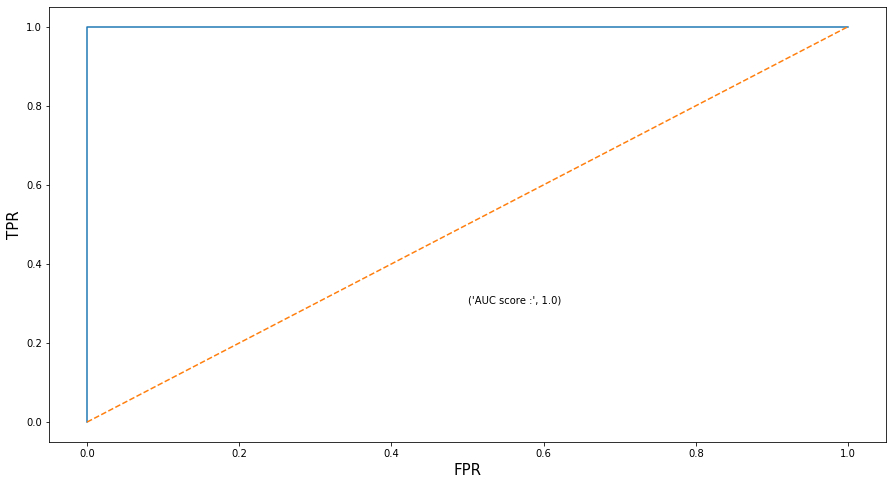

In [34]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 80)

ada.fit(X_train, y_train)

from sklearn.metrics import roc_auc_score, roc_curve

y_test_prob = ada.predict_proba(X_test)[:,1]

y_test_pred = ada.predict(X_test)

fpr, tpr , threshold = roc_curve(y_test, y_test_prob)

plt.figure(figsize = (15,8))

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, '--')

plt.xlabel('FPR',fontsize = 15)
plt.ylabel('TPR', fontsize = 15)

plt.text(x = 0.5, y = 0.3, s = ('AUC score :',roc_auc_score(y_test, y_test_prob)))

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Select the optimal maximum depth from the given values for 180 base learners to build the gradient boosting classifier (consider 3-fold cross validation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

depth = [2, 3, 4, 5, 6, 7, 8]

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [2,3,4,5,6,7,8]}

gsearch = GridSearchCV(gbc, param_grid = params, cv = 3, scoring = 'roc_auc', n_jobs = -1)

gsearch.fit(X, y)

print('The optimal max depth value for 180 base estimators is :', gsearch.best_params_)

The optimal max depth value for 180 base estimators is : {'max_depth': 2}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build the XGBoost model with a learning rate of 0.4 and gamma equal to 3. Calculate the accuracy by plotting the confusion matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.4, gamma = 3)

xgb.fit(X_train, y_train)

y_test_pred = xgb.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

cm

[22:05:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\abhin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


array([[29,  0],
       [ 0, 11]], dtype=int64)

In [37]:
total = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]

Accuracy = (cm[0,0] + cm[1,1]) / total

print('Accuracy :', Accuracy)

Accuracy : 1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the stacking technique on 70% of the data with the 9-NN and Naive Bayes model as base learners. Consider the Adaboost model as a final estimator. Also, compute the AUC score of the model </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((139, 5), (60, 5), (139,), (60,))

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import StackingClassifier

base_learner = [('KNeighbors',KNeighborsClassifier(n_neighbors = 9)),
               ('GaussianNB',GaussianNB())]

stack = StackingClassifier(estimators = base_learner, final_estimator = AdaBoostClassifier(random_state = 10))

stack.fit(X_train, y_train)

StackingClassifier(estimators=[('KNeighbors',
                                KNeighborsClassifier(n_neighbors=9)),
                               ('GaussianNB', GaussianNB())],
                   final_estimator=AdaBoostClassifier(random_state=10))

In [41]:
y_test_prob = stack.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score

print('AUC score :', roc_auc_score(y_test, y_test_prob))

AUC score : 0.9871630295250321


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Use the base learners in Q9 and build a stacking model with the XGBoost as final estimator. Compute the AUC score of the model and compare it with the result of Q9 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
from xgboost import XGBClassifier

stack = StackingClassifier(estimators = base_learner, final_estimator = XGBClassifier(random_state = 10))

stack.fit(X_train, y_train)

y_test_prob = stack.predict_proba(X_test)[:,1]

print('AUC score :',roc_auc_score(y_test, y_test_prob))

[22:17:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC score : 0.9704749679075738


C:\Users\abhin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
